In [43]:
import random
import matplotlib.pyplot as plt
import copy

In [44]:
file = open('./data2/8gau.txt')
lines = file.readlines()
random.seed(8)

In [45]:
Pts = []
# 取出所有的点
for line in lines:
    line = line.strip('\n')
    words = line.split('    ')
    words = words[1:]
    Pts.append((int(words[0]), int(words[1])))
# 打乱顺序
# random.shuffle(Pts)

In [46]:
# 8 clasters
clusters = 8
repeat = 3
COLOR = ['#800000', 'b', 'g', 'r', 'm', 'y', 'k', '#00CED1','#4B0082']

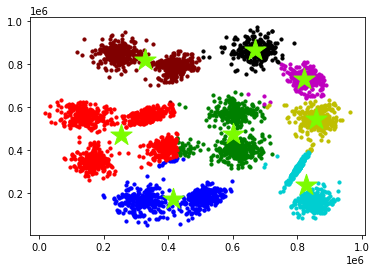

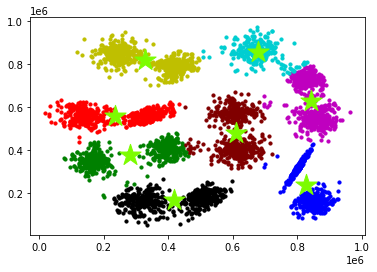

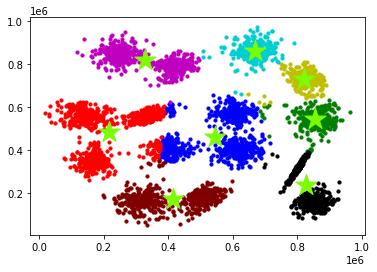

In [51]:
for time in range(repeat):
    centers = []
    result = []
    # 随机选择K个点作为 聚类中心
    for i in range(clusters):
        result.append([])
        centers.append(random.choice(Pts))
    
    centers_pre=[]
    for i in range(8):
        centers_pre.append((0,0))
    while(1):
        # 按照距离聚类
        for i in Pts:
            # 选择出距离最小的一个
            distance = 999999999
            index = -1
            for c in centers:
                curDis = ((i[0] - c[0]) ** 2 + (i[1] - c[1]) ** 2) ** 0.5
                if curDis < distance:
                    distance = curDis
                    index = centers.index(c)
            result[index].append(i)
        # 使用类中 坐标均值作为新的 种子点
        centers = []

        for KPt in result:
            xMean = 0
            yMean = 0
            for i in KPt:
                xMean += i[0]
                yMean += i[1]
            xMean /= len(KPt)
            yMean /= len(KPt)
            centers.append((xMean, yMean))
        # 判断是否已经收敛
        centers_sum=0
        for i in range(len(centers)):
            dis=((centers[i][0]-centers_pre[i][0])**2+(centers[i][1]-centers_pre[i][1])**2)**0.5
            centers_sum+=dis
        if(centers_sum<1e-8):
            break
        else:
            centers_pre=copy.deepcopy(centers)
            # 循环结束清空本次Result
            for i in range(len(result)):
                result[i] = []
                
    # 每次 重复 都画图
    colorIndex = 0
    plt.figure()
    for res in result:
        x = []
        y = []
        for pt in res:
            x.append(pt[0])
            y.append(pt[1])
        plt.scatter(x, y, marker='o', c=COLOR[colorIndex],s=10)
        colorIndex += 1
    colorIndex = 0
    for i in centers_pre:
        plt.scatter(i[0], i[1], marker='*', c='#7CFC00',s=500)
        colorIndex +=1
    plt.show()